In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [4]:
# Generate sine LUT with N samples
N = 256

t = np.linspace(0, 1, 256)
x = np.arange(0, 1, 1/N)
sin_lut = [np.sin(2*np.pi*t) for t in x]
plt.plot(t, np.sin(2*np.pi*t), x, sin_lut, 'o')

   0,    3,    6,    9,   12,   15,   18,   21,   24,   27,   30,   33, 
  36,   39,   42,   45,   48,   51,   54,   57,   59,   62,   65,   67, 
  70,   73,   75,   78,   80,   82,   85,   87,   89,   91,   94,   96, 
  98,  100,  102,  103,  105,  107,  108,  110,  112,  113,  114,  116, 
 117,  118,  119,  120,  121,  122,  123,  123,  124,  125,  125,  126, 
 126,  126,  126,  126,  127,  126,  126,  126,  126,  126,  125,  125, 
 124,  123,  123,  122,  121,  120,  119,  118,  117,  116,  114,  113, 
 112,  110,  108,  107,  105,  103,  102,  100,   98,   96,   94,   91, 
  89,   87,   85,   82,   80,   78,   75,   73,   70,   67,   65,   62, 
  59,   57,   54,   51,   48,   45,   42,   39,   36,   33,   30,   27, 
  24,   21,   18,   15,   12,    9,    6,    3,    0,   -3,   -6,   -9, 
 -12,  -15,  -18,  -21,  -24,  -27,  -30,  -33,  -36,  -39,  -42,  -45, 
 -48,  -51,  -54,  -57,  -59,  -62,  -65,  -67,  -70,  -73,  -75,  -78, 
 -80,  -82,  -85,  -87,  -89,  -91,  -94,  -96,  -9

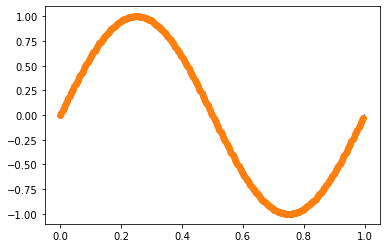

In [5]:
def print_buf(x, xlen):
    row_len = 12
    for i in range(0, xlen, row_len):
        for j in range(0, row_len):
            if (i+j) >= xlen:
                break
            print('{:4d}, '.format(int(x[i+j])), end='')
        print()

c_lut = np.array(sin_lut) * 127
print_buf(c_lut, N)

s: 109, m: 0.42578125
126.96174997441794


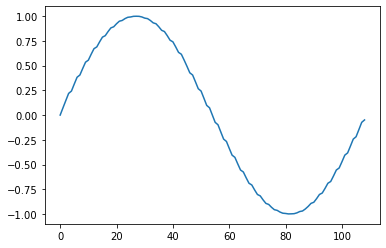

In [26]:
# Generate sin wave using sin_lut

Fs = 48000
f = 440
s = Fs//f

m = s/N
print(f's: {s}, m: {m}')

out = [0] * int(s)
ind = 0
ratio = 0
for i in range(0, s):
    # Loop over each spot that needs to be filled
    # NOTE: Only works for N > Fs//f
    #       or m <= 1.0
    out[i] = sin_lut[ind]
    ratio = (i+1)/(ind+1)

    if m <= 1:
        if ratio < m:
            ind += 1
        else:
            ind += int(np.ceil(1/m))
    else:  # m > 1
        if ratio < m:
            ind += 0
        else:
            ind += 1


pout = np.array(out) * 127
print(max(pout))
# print_buf(pout, s)

out = np.array(out)
plt.plot(out);

Audio(np.tile(out, 500), rate=Fs)

In [ ]:

out[out>=0] = 1
out[out<0] = -1
plt.plot(out)

Audio(np.tile(out, 500), rate=Fs)